## Problema

Uma plataforma de educação consegue acompanhar a quantidade de horas que um aluno estuda em uma determinada trilha. Eles querem saber se a quantidade de horas de estudo influencia na pontuação do teste final dessa trilha e se é possível predizer a nota, dada a quantidade de horas de estudo. 

### #Import das Bibliotecas

In [1]:
from sklearn.model_selection import train_test_split # Separa o dataset em treino e teste
from sklearn.linear_model import LinearRegression # Esse módulo contém o modelo que vamos usar: Regressão Linear
from scipy.stats import shapiro, kstest, probplot # Shapiro e kstest fazem teste de normalidade / probplot é um plot de probabilidade
import pandas as pd # Lida com os dados
import seaborn as sns # Plot de gráficos
import matplotlib.pyplot as plt # Plot de gráficos
from statsmodels.graphics.gofplots import qqplot # Mostra a normalidade de forma gráfica

### 1. Carga, limpeza e tratamento dos dados

In [2]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [3]:
# Checar a estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


É possível perceber que os tipos inferidos às variáveis estão corretos e que não há valores ausentes

In [4]:
# Visualizar topo do dataset
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
# Visualizar final do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### 2. EDA (Exploratory Data Analysis)

In [6]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


#### Gráfico de Dispersão

<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

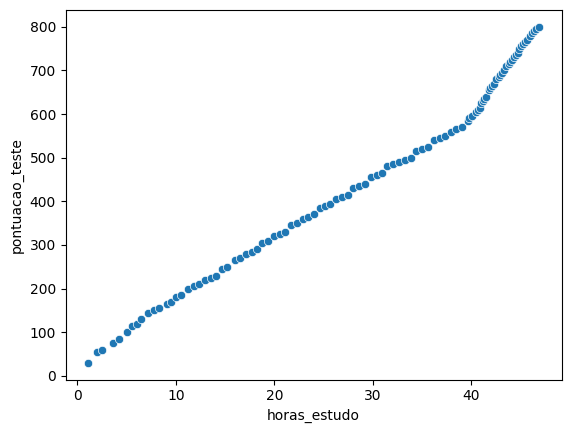

In [7]:
# Plot de Dispersão
# X = horas_estudo (variável independente)
# y = pontuacao_teste (variável dependente)
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

Percepções em relação ao gráfico de dispersão:
- Existe uma relação forte entre entre a as duas vriáveis;
- Aproximadamente a partir de 40 horas de estudo, começa a ter um volume maior de dados;
- O desenho do gráfico começa a escapar da reta imaginaria a partir de 40 horas de estudo, aproximadamente.

#### Verificação de Outliers - Gráfico BoxPlot

<Axes: ylabel='horas_estudo'>

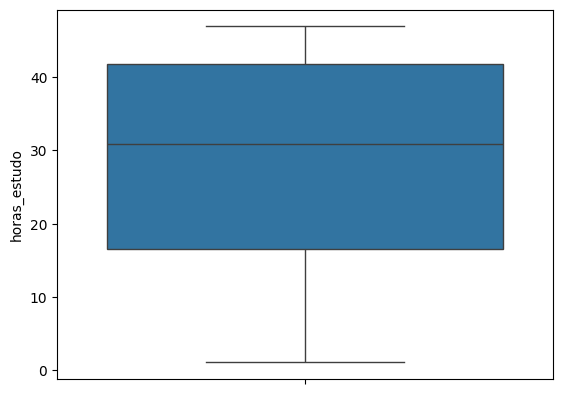

In [8]:
# Verificar outliers - Horas de Estudo
# Plot BoxPlot - Horas de Estudo
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

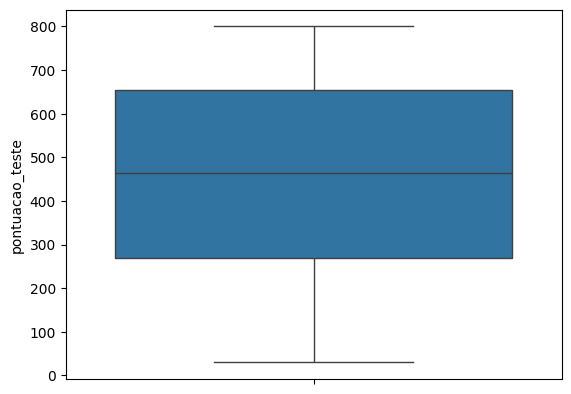

In [9]:
# Verificar Outliers - Pontuação do Teste
# Plot BoxPlot - Pontuação do Teste
sns.boxplot(df_pontuacao, y='pontuacao_teste')

Conclusão da análise de outliers:
- Não foram encontrados outliers nas variáveis analisadas: pontuação_teste e horas_estudo

#### Análise de Correlação

- Correlação Linear de Pearson

<Axes: >

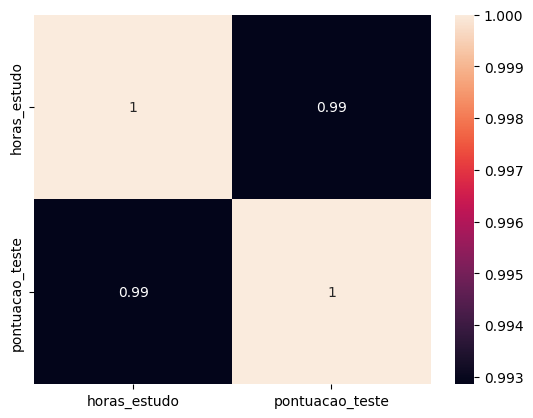

In [10]:
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

A Correlação Linear de Pearson mede a intensidade e a direção de relações lineares. É possível perceber no mapa de calor gerado, que o grau de relacionamento entre as variáveis é muito alto.

- Correlação de Spearman

<Axes: >

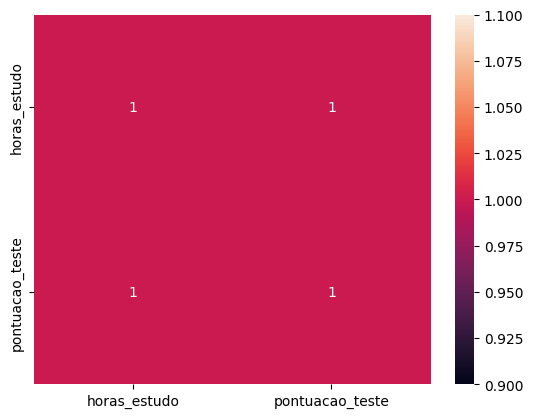

In [11]:
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

A Correlação de Spearman lida também com relações não lineares. Por ela, é possível observar que a correlção entre as variáveis é ainda mais forte.

#### Analisar a característica desse dataframe em relação a distribuição dele - Plot Histograma

- Histograma - horas_estudo

<Axes: xlabel='horas_estudo', ylabel='Count'>

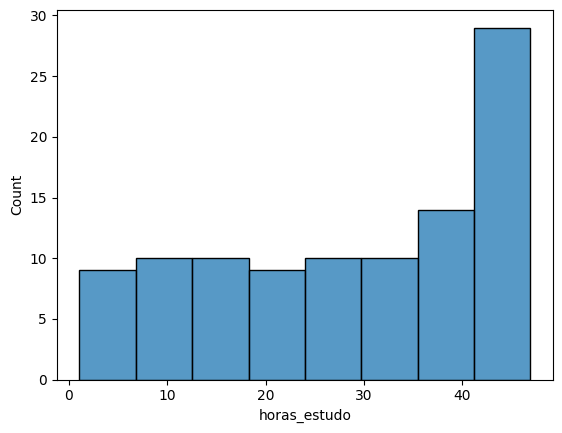

In [12]:
sns.histplot(df_pontuacao, x='horas_estudo')

De acordo com o Histograma de horas_estudo, acima das 40 horas, aproximadamente, temos um volume maior de dados. Isso pode ser confirmado pelo gráfico de Dispersão plotado anteriormente. Nele, é possível perceber que o gráfico começa a escapar mais nitidamente da reta imaginária aproximadamente a partir das 40 hoas.

- Histograma - pontuacao_teste

<Axes: xlabel='pontuacao_teste', ylabel='Count'>

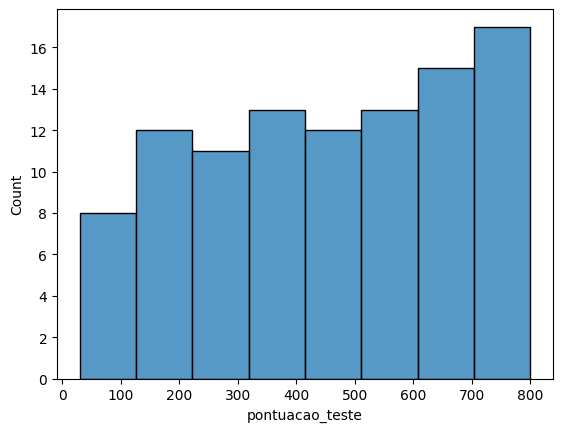

In [13]:
sns.histplot(df_pontuacao, x='pontuacao_teste')

É possível concluir pelos Histogramas plotados, que nenhuma das variáveis sege, visualmente, uma distribuição normal e que ambas possuem uma assimetria negativa (sendo horas_estudo com uma maior assimetria).

### 3. Treinamento do Modelo

In [15]:
# Separar as variáveis independente e dependente em X e y
# Quando temos uma regressão linear simples, precisamos ajustar o shape
# Isso é feito para que o X e o y fiquem prontos para o treinamento

# Separação das variáveis em X (variável dependente) e y (variável independente)
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

# Dividir X e y entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [16]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [17]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Imprimir a equação da reta
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### 4. Validação do Modelo - Métricas

In [20]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

##### Vamos começar a comparar a predição, 'y_pred', com o valor real, 'y_test'

- R-Squared

In [21]:
# Calculr métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação da variável dependente que é explicada pela variável independente
# R2 representa um número entre 0 e 1 e quanto mais próximo de 1, melhor o modelo consegue explicar a variância dos dados.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

- MAE (Mean Absolut Error)

In [22]:
# Calcular métrica MAE (Mean Absolut Error)
# MAE = Media (y_test - y_pred)
# É uma métrica fácil de interpretar
# MAE é menos sensível a outliers
# O erro é obtido na mesma ordem de grandeza da variável
mean_absolute_error(y_test, y_pred)

22.957470277134615

Logo, considerando uma pontuação de 0 à 800, uma média de erros de 23 pontos não parece ser ruim. 

- MSE (Mean Squared Error)

In [23]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Media (y_test - y_pred)^2
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza grandes erros
# É mais utilizado para comparar dois modelos
# Usado também para comparar a evolução de um modelo, quanto mais vai evoluindo, menor é o MSE
mean_squared_error(y_test, y_pred)

766.9972992416427

- RMSE (Square Root Mean Squared Error) 

In [29]:
# Calcular métrica RMSE (Square Root Mean Squared Error)
# RMSE = Raiz (Media (y_test - y_pred)^2)
# É uma métrica fácil de interpretar
# É mais sensível a outliers e penaliza grandes erros
# Considerado um equilíbrio entre o MAE e o MSE, ele penaliza os grandes erros mas consegue um resultado na mesma ordem de grandeza da variável
mean_squared_error(y_test, y_pred, squared=False)

/home/elena-calcada/.local/share/virtualenvs/regressao_linear_simples-knk_5-Xv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


27.69471608884342

Logo, a média de erros foi de aproximadamente 28 pontos. Foi um pouco maior que o MAE. 

Agora, vamos comparar graficamete os valores reais, y_test, com os valores preditos, y_pred

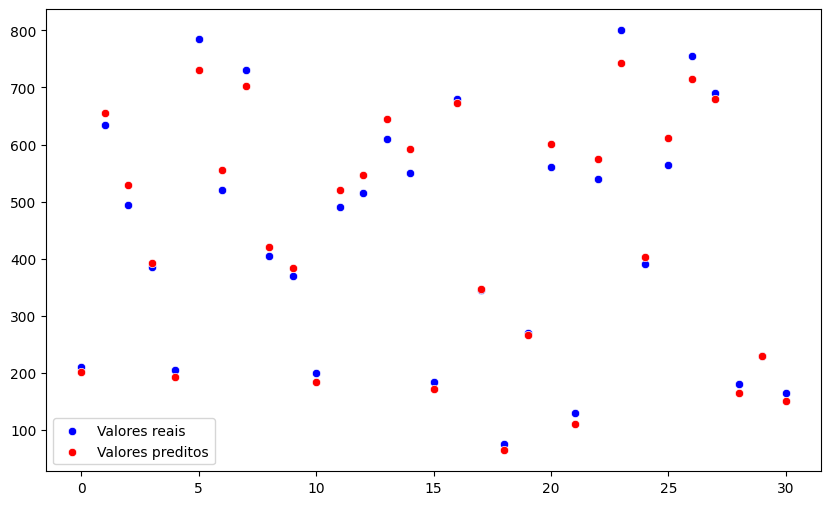

In [24]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores preditos')
plt.legend()
plt.show()

### 5. Análise de Resíduos

In [25]:
# Calcular resídios
# Resíduos em valores absolutos
residuos = y_test - y_pred

In [26]:
# Calcular resíduos convertidos para a escala padrão
# Resíduos padronizados (standardization -> std)
# Pra cada elemento do conjunto: (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

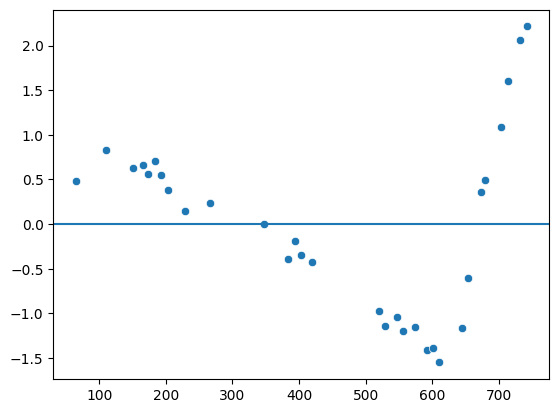

In [27]:
# 1 - Verificar linearidade do modelo
# Se os resíduos, na escala padrão, estiverem entre -2 e 2, isso indica linearidade

# 2 - Verificar a homogeneidade das variâncias (Homocedasticidade)
# Se os valores estiverem em trono da reta (y=0), temos homocedasticidade
# Se os valores formarem alguma tendência ou padrão (formarem um cone, um funil...), temos heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

- É possível perceber que o modelo não é tão linerar assim, pois há valores que escapam do intervalo entre -2 e 2.
- Percebe-se também que os valores não se concentram em torno da reta, eles seguem um padrão. Isso indica heterocedacidade, ou seja, que as variâncias não são homogêneas.

Graficamente, em termo de resíduo, parece que esse modelo linear não conseguiu capturar muito bem os padrões para que fosse possível fazer boas predições, por mais que as métricas nos digam outra coisa.

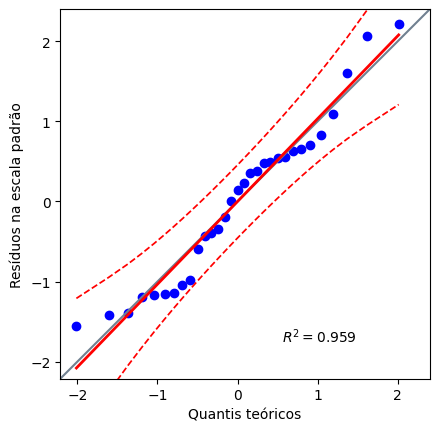

In [28]:
# Checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot: avalia se uma amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95) # gráfico qqplot em um intervalo de 95% de confiança na distribuição normal
plt.xlabel('Quantis teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

É possível perceber que existem pontos muito próximos ao intervalo de segurança, isso não legal. Os pontos deveriam estar mais próximos a reta, mais em torno da reta.
Mais uma vez, graficamente, em termo de resíduo, parece que esse modelo linear não conseguiu capturar muito bem os padrões para que fosse possível fazer boas predições, por mais que as métricas nos digam outra coisa.

In [31]:
# Teste de Hipótese - Teste de Normalidade - Shapiro Wilk
# H0 - os resíduos seguem uma distribuição normal
# H1 - os resíduos não seguem uma distribuição normal
# P-Value > 0.05 - H0 não é rejeitado
# P-Value < 0.05 - H0 é rejeitado

stat_shapiro, p_value_shapiro = shapiro(residuos.reshape(-1))
print('Estatística do teste: {}'.format(stat_shapiro))
print('P_Value: {}'.format(p_value_shapiro))

Estatística do teste: 0.9500532226161759
P_Value: 0.15663817850304967


Como P-Value > 0.05, não rejeitamos H0.
Isso significa que pelo Teste de Hipótese de Shapiro Wilk, os resíduos seguem uma distribuição normal.

In [32]:
# Teste de Hipótese - Teste de Normalidade - Kolmogorov-Smirnov
# H0 - os resíduos seguem uma distribuição normal
# H1 - os resíduos não seguem uma distribuição normal
# P-Value > 0.05 - H0 não é rejeitado
# P-Value < 0.05 - H0 é rejeitado

stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatística do teste: {}'.format(stat_ks))
print('P_Value: {}'.format(p_value_ks))

Estatística do teste: 0.48355808450512827
P_Value: 3.395368995814077e-07


Como P-Value <> 0.05, rejeitamos H0.
Isso significa que pelo Teste de Hipótese Kolmogorov-Smirnov, os resíduos não seguem uma distribuição normal.

#### Conclusões

- Temos um modelo que foi bem quando analisamos as métricas, mas não foi bem quando analisamos os resíduos.
- O modelo consegue fazer previsões com erros médios de até 28 pontos. Não parece ser um erro que prejudique tanto. Porém, é preciso verificar com quem solicitou o projeto se realmente não será prejudicial ou se ele quer de algo mais preciso.
- Para tentar um modelo mais preciso, talvez fosse interessante solicitar um volume maior de dados.
- Com um volume maior de dados, tentar técnicas de treino diferentes.
- Talvez, identificar uma segunda variável independente que ajude a ajustar melhor o modelo (nesse caso, teríamos uma regressão linear múltipla)


### 6. Fazer predições com o modelo

In [33]:
# Se eu estudar 30.4 horas, qual a pontuação prevista para o modelo?
reg_model.predict([[30.4]])

array([[484.01220436]])

### 7. Salvar modelo para usar depois

In [34]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']